This code builds a Convolutional Neural Network (CNN) model using Keras for binary image classification (e.g., classifying between a cat or a dog). The CNN model is trained on images and tested with a single image to predict whether it is a cat or a dog. Here's the step-by-step explanation:

In [ ]:
pip install keras-preprocessing

In [1]:
from keras.layers import Convolution2D

In [2]:
from keras.layers import MaxPooling2D

In [3]:
from keras.layers import Flatten

In [4]:
from keras.layers import Dense

In [5]:
from keras.models import Sequential

Building the CNN Model

The model is created using a Sequential API where layers are added one by one.



In [6]:
model = Sequential()

Convolutional Layer:

In [7]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filters: 32 filters are used to detect different features of the images.
    
Kernel Size: A 3x3 filter is applied to extract features.
    
Activation: relu is used to remove negative values and keep only positive activations, which accelerates training.

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

Max Pooling Layer:

In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

This reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 block.

Adding More Layers:

In [10]:
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Another convolutional and pooling layer are added to extract deeper features from the image.

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

Flattening:

In [13]:
model.add(Flatten())

Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,144 (39.62 KB)

 Trainable params: 10,144 (39.62 KB)

 Non-trainable params: 0 (0.00 B)

Fully Connected Layers (Dense Layers):

In [15]:
model.add(Dense(units=128, activation='relu'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,088 (3.10 MB)

 Trainable params: 813,088 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.add(Dense(units=1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

The first Dense layer has 128 units with relu activation to introduce non-linearity.

The output layer has 1 unit with sigmoid activation for binary classification (cat or dog).

Compiling the Model

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer: Adam is used to optimize the model's learning process.
    
Loss: Binary cross-entropy is used because this is a binary classification problem.
    
Metrics: Accuracy is used to evaluate the model's performance.

ImageDataGenerator is used to augment the image dataset. It applies transformations such as rescaling, zooming, and flipping to create more diverse training data and prevent overfitting.

In [20]:
from keras_preprocessing.image import ImageDataGenerator

Loading the Dataset

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'cnn_dataset',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
test_set = test_datagen.flow_from_directory(
        'cnn_dataset',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')
model.fit(
        training_set,
        steps_per_epoch=8000,
        epochs=2,
        validation_data=test_set,
        validation_steps=800)

Found 10002 images belonging to 1 classes.
Found 10002 images belonging to 1 classes.
Epoch 1/2


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 312/8000 ━━━━━━━━━━━━━━━━━━━━ 1:22:12 642ms/step - accuracy: 0.9962 - loss: 0.0137

C:\Users\Admin\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8000/8000 ━━━━━━━━━━━━━━━━━━━━ 259s 31ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 3.4272e-11
Epoch 2/2
8000/8000 ━━━━━━━━━━━━━━━━━━━━ 98s 12ms/step - accuracy: 1.0000 - loss: 3.5893e-10 - val_accuracy: 1.0000 - val_loss: 3.4214e-11


flow_from_directory loads images from a directory and labels them based on the folder names. It expects the folder structure to follow:

target_size=(64, 64) resizes the images to 64x64 pixels.

class_mode='binary' indicates it's a binary classification problem.

Training the Model

model.fit(training_set, steps_per_epoch=8000, epochs=2, validation_data=test_set, validation_steps=800)

steps_per_epoch: Defines how many batches of data the model will see in one epoch.
    
epochs: Number of training cycles.
    
validation_data: The test set is used for validation after each epoch.

Saving and Loading the Model

In [23]:
model.save('my.h5')

After training, the model is saved as 'my.h5' and can be loaded for future predictions.

In [24]:
from keras.models import load_model cnn-cat-dog-model.h5

In [42]:
m = load_model('my.h5')

A single image is loaded, converted to an array, and resized to 64x64 pixels.

The model predicts the class of the image using

In [43]:
from keras.preprocessing import image 

In [44]:
test_image = image.load_img('cnn_dataset/cnn_dataset/single_prediction/cat_or_dog_1.jpg', 
               target_size=(64,64))

In [45]:
type(test_image)

PIL.Image.Image

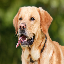

In [46]:
test_image

In [47]:
test_image = image.img_to_array(test_image)

In [48]:
type(test_image)

numpy.ndarray

In [49]:
test_image.shape

(64, 64, 3)

In [50]:
import numpy as np 

In [51]:
test_image = np.expand_dims(test_image, axis=0)

In [52]:
test_image.shape

(1, 64, 64, 3)

In [53]:
result = m.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


In [54]:
result

array([[0.]], dtype=float32)

Result Interpretation

In [55]:
if result[0][0] == 1.0:
    print('cat')
else:
    print('dog')

dog


Viewing Class Indices

In [56]:
r = training_set.class_indices

In [57]:
r

{'cnn_dataset': 0}

This shows the mapping of class names to integer labels (e.g., {‘cat’: 0, ‘dog’: 1}).